#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

In [2]:
def line(w0,w1,x_points):
    return w0+w1*x_points

def plane(w0,w1,w2,x1_points,x2_points):
    return w0+w1*x1_points+w2*x2_points

def error_calc(y_pred,y_actual):
    squared_sum_error=np.sum((y_pred-y_actual)**2)
    error=squared_sum_error/y_actual.shape[0]
    return error

def delta_error(x_actual,y_actual,y_pred):
    difference=y_actual-y_pred
    product_with_x=np.sum(difference*x_actual)
    delta_err=product_with_x*(-2)/y_pred.shape[0]
    return delta_err
    

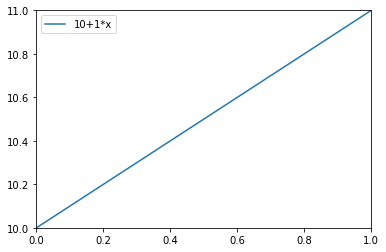

In [3]:
## Write your code here
#Parameters
start_number=0
end_number=1
no_of_points=1000


#Code
x_points=np.linspace(start=start_number,stop=end_number, num=no_of_points)
w0:int=10
w1:int=1
y_points=line(w0=w0,w1=w1,x_points=x_points)
plt.plot(x_points,y_points)
plt.xlim(min(x_points),max(x_points))
plt.ylim(min(y_points),max(y_points))
plt.legend([str(w0)+'+'+str(w1)+'*x'])
plt.show()


#delete variables
del(start_number,end_number,no_of_points,w0,w1)

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

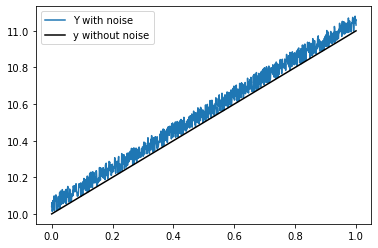

In [4]:
## Write your code here

#Paramters
start_number=0
end_number=1
weight_of_noise=0.1


#code
y_noise=np.random.uniform(low=start_number,high=end_number,size=y_points.shape[0])
y_cor=y_points+weight_of_noise*y_noise
plt.plot(x_points,y_cor)
plt.plot(x_points,y_points,color='black')
plt.legend(["Y with noise","y without noise"])
plt.show()


#delete variables
del(start_number,end_number,weight_of_noise,y_noise)
del(y_points)


**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

Optimal Value of w1 is:- 1.0780780780780779


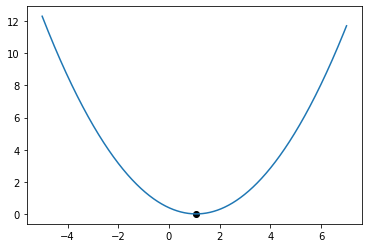

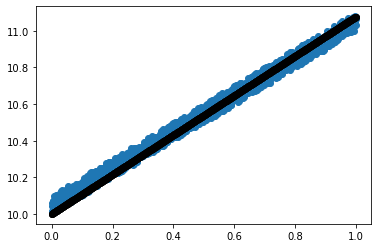

In [5]:
## Write your code here
#parameters
w0=10
start_number=-5
end_number=7
size_of_search_space=1000

#code
search_space=np.linspace(start=start_number,stop=end_number,num=size_of_search_space)
error_vector=np.empty((size_of_search_space))
itr=0


for i in search_space:
    y_pred=line(w0=w0,w1=i,x_points=x_points)
    error_vector[itr]=error_calc(y_actual=y_cor,y_pred=y_pred)
    itr+=1

min_pos=np.argmin(error_vector)
optimal_w1=search_space[min_pos]
print("Optimal Value of w1 is:-",optimal_w1)


#Generate plots
plt.plot(search_space,error_vector)
plt.scatter(optimal_w1,error_vector[min_pos],color='black')
plt.show()

plt.scatter(x_points,y_cor)
plt.scatter(x_points,line(w0=w0,w1=optimal_w1,x_points=x_points),color='black',)
plt.show()

# plt.plot(x_points,y_cor)
# plt.plot(x_points,line(w0=w0,w1=optimal_w1,x_points=x_points),color='black')
# plt.show()


#Delete variables
del(w0,start_number,end_number,size_of_search_space,itr,min_pos,optimal_w1)

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

Optiomal Value of w1 is:-  1.0744127280722058
Error at optimal value is:- 0.0014173426926378351
delta_error at this point:-  -3.907985046680551e-17


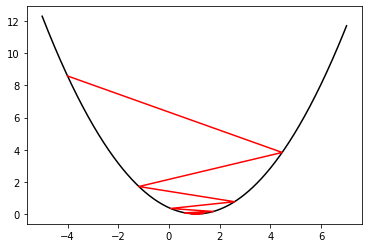

In [6]:
## Write your code here
#parameters


w0=10
learning_rate=2.5
w1=-4


#code
w1_vector=[]
error_vector_gd=[]
while i in range(10):
    w1_vector.append(w1)
    y_pred=line(w0=w0,w1=w1,x_points=x_points)
    error=error_calc(y_pred=y_pred,y_actual=y_cor)
    del_err=delta_error(x_actual=x_points,y_actual=y_cor,y_pred=y_pred)
    error_vector_gd.append(error)
    w1_new=w1-learning_rate*del_err
    if(w1_new==w1):
        break
    w1=w1_new

print("Optiomal Value of w1 is:- ",w1)
print("Error at optimal value is:-",error_vector_gd[-1])
print("delta_error at this point:- ",del_err)
#plot graphs
plt.plot(search_space,error_vector,color='black')
plt.plot(w1_vector,error_vector_gd,color="red")

#delete variables
try:
    del(x_points,y_cor,y_points,w0,w1,error_vector_gd,search_space,w1_vector,del_err,y_pred,error_vector)
except:
    pass

#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

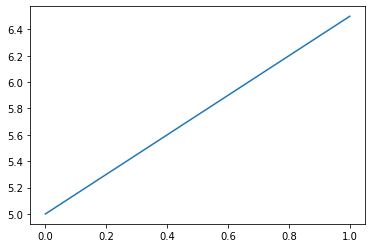

In [7]:
## Write your code here
#parameters
no_of_points=1000
start_number=0
end_number=1
w0=5
w1=1.5

#code
x_points=np.linspace(start=start_number,stop=end_number,num=no_of_points)
y_points=line(w0=w0,w1=w1,x_points=x_points)

#plot
plt.plot(x_points,y_points)

#deleting variables
del(no_of_points,start_number,end_number,w0,w1)

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

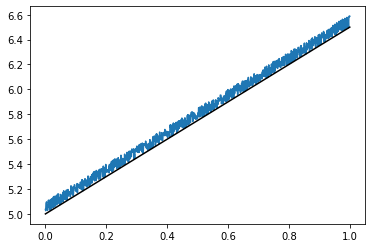

In [8]:
#parameters
start_number=0
end_number=1
no_of_points=y_points.shape[0]

#code
noise=np.random.uniform(low=start_number,high=end_number,size=no_of_points)
y_cor=y_points+0.1*noise

plt.plot(x_points,y_cor)
plt.plot(x_points,y_points,color="black")

#deleting variables
del(noise,y_points,start_number,end_number,no_of_points)

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

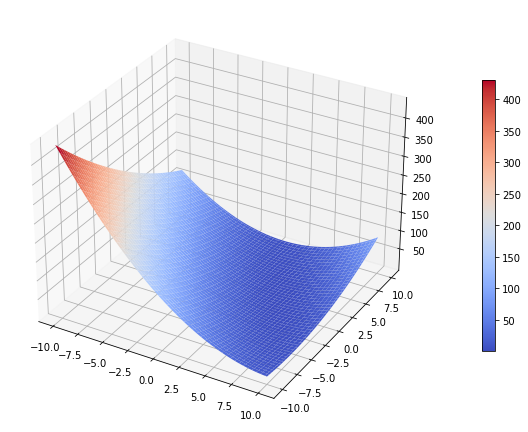

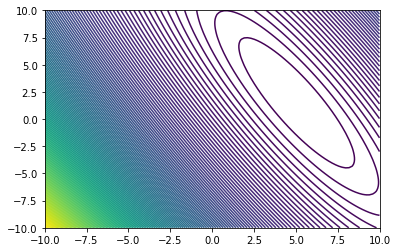

In [9]:
#parameters
start_number=-10
end_number=10
no_of_points=100
error_vector=[]


#code
search_space_w0=np.linspace(start=start_number,stop=end_number,num=no_of_points)
search_space_w1=search_space_w0.copy()

# xp=np.tile(np.array([search_space_w0]),reps=(100,1))
# search_space_w0=np.tile(np.array([search_space_w0]),reps=(100,1))
# search_space_w1=np.tile(np.array([search_space_w1]),reps=(100,1)).T
# print(search_space_w0[0])
# print(search_space_w1[1])


W0,W1=np.meshgrid(search_space_w0,search_space_w1)
error_vector=np.empty((no_of_points,no_of_points))
for i in range(no_of_points):
    for j in range(no_of_points):
        y_pred=line(w0=W0[i][j],w1=W1[i][j],x_points=x_points)
        error_vector[i][j]=(error_calc(y_pred=y_pred,y_actual=y_cor))


# error_vector=(error_calc(y_pred=line(w0=search_space_w0,w1=search_space_w1,x_points=x_points),y_actual=y_cor))
fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
# W0,W1=np.meshgrid(w0,w1)
surf=ax.plot_surface(W0,W1,error_vector,cmap=plt.cm.coolwarm)
plt.colorbar(surf,shrink=0.5,pad=0.1)
plt.show()
plt.contour(W0,W1,error_vector,150)
plt.show()

#deleting variables
del(start_number,end_number,no_of_points,search_space_w0,search_space_w1,W0,W1,error_vector,y_pred)

**Gradient Descent to find optimal Values**

In [10]:
## Write your code here
#Parameters
w0=2
w1=1.3
learning_rate=0.05
#code
w1_new=w1
w0_new=w0
while True:
    y_pred=line(w0=w0,w1=w1,x_points=x_points)
    error=error_calc(y_pred=y_pred,y_actual=y_cor)
    # print(w0,w1)
    del_err_w1=delta_error(x_actual=x_points,y_actual=y_cor,y_pred=y_pred)
    del_err_w0=delta_error(x_actual=np.array([1]*x_points.shape[0]),y_actual=y_cor,y_pred=y_pred)
    # del_err_w0=-2*np.sum(y_cor-y_pred)/y_cor.shape[0]
    w1_new=w1-learning_rate*del_err_w1
    w0_new=w0-learning_rate*del_err_w0
    if(abs(w1_new-w1)<=10**-7 and abs(w0-w0_new)<=10**-7):
        break
    w1=w1_new
    w0=w0_new

print("Optiomal Value of w0 is:- ",w0)
print("Optiomal Value of w1 is:- ",w1)
y_pred=line(w0=w0,w1=w1,x_points=x_points)
error=error_calc(y_pred=y_pred,y_actual=y_cor)
print(error)


#deleting variables
del(w0,w1,learning_rate,w1_new,w0_new,del_err_w0,del_err_w1,error,y_cor,x_points)

Optiomal Value of w0 is:-  5.052354857339965
Optiomal Value of w1 is:-  1.4981133268525397
0.0008175096039728462


#### END OF TWO VARIBLE LINES

#### START OF PLANE

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

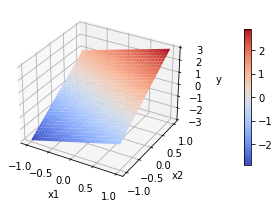

In [11]:
## Write your code here
start_number=-1
end_number=1
no_of_points=30
w0=0
w1=1
w2=2

#code
x1_points=np.linspace(start=start_number,stop=end_number,num=no_of_points)
x2_points=np.linspace(start=start_number,stop=end_number,num=no_of_points)



fig=plt.figure(figsize=(5,5))
ax=plt.axes(projection='3d')
x1,x2=np.meshgrid(x1_points,x2_points)
y_points=w0+w1*x1+w2*x2


plt.colorbar(ax.plot_surface(x1,x2,y_points,cmap=plt.cm.coolwarm),shrink=0.5,pad=0.2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
#DELETING VARIABLES 
del(w0,w1,w2,start_number,end_number,no_of_points)

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

In [12]:
#parameters
start_number=-10
end_number=10
no_of_points=1000
error_vector=[]

#code
search_space_w1=np.linspace(start=start_number,stop=end_number,num=no_of_points)
search_space_w2=np.linspace(start=start_number,stop=end_number,num=no_of_points)
W1,W2=np.meshgrid(search_space_w1,search_space_w2)


error_vector=np.empty((no_of_points,no_of_points))
for i in range(no_of_points):
    for j in range(no_of_points):
        y_pred=plane(w0=0,w1=W1[i][j],w2=W2[i][j],x1_points=x1,x2_points=x2)
        error_vector[i][j]=(error_calc(y_pred=y_pred,y_actual=y_points))
#plotting
fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
surf=ax.plot_surface(W1,W2,error_vector,cmap=plt.cm.coolwarm)
plt.colorbar(surf,shrink=0.5,pad=0.1)
plt.show()

plt.contour(W1,W2,error_vector,150)

# print(np.min(error_vector[:,1]))
result=np.where(error_vector==np.min(error_vector))
print(result[0][0],result[1][0])
print(W1[result[0][0]][result[1][0]],W2[result[0][0]][result[1][0]])
#deleting variables
try:
    del(search_space_w1,search_space_w2,error_vector,W1,W2,start_number,end_number,no_of_points,error_vector,y_pred,i,j)
except:
    pass



**Prediction using Gradient Descent**

In [14]:
## Write your code here
#Parameters
w0=0
w1=0
w2=0
learning_rate=0.005
#code
w1_new=w1
w2_new=w2
while True:
    y_pred=plane(w0=w0,w1=w1,w2=w2,x1_points=x1,x2_points=x2)
    error=error_calc(y_pred=y_pred,y_actual=y_points)
    # print(w1,w2)
    del_err_w1=delta_error(x_actual=x1,y_actual=y_points,y_pred=y_pred)
    del_err_w2=delta_error(x_actual=x2,y_actual=y_points,y_pred=y_pred)
    w1_new=w1-learning_rate*del_err_w1
    w2_new=w2-learning_rate*del_err_w2
    if(abs(w1_new-w1)<=10**-14 and abs(w2-w2_new)<=10**-14 and error<10):
        break
    w1=w1_new
    w2=w2_new

print("Optiomal Value of w0 is:- ",w1)
print("Optiomal Value of w1 is:- ",w2)
y_pred=plane(w0=w0,w1=w1,w2=w2,x1_points=x1,x2_points=x2)
error=error_calc(y_pred=y_pred,y_actual=y_points)
print("Error at that point",error)


#deleting variables
# try:
#     del(w0,w1,w2,w1_new,w2_new,error,del_err_w1,del_err_w2,learning_rate,y_pred)
# except:
#     pass


Optiomal Value of w0 is:-  0.9999999999999559
Optiomal Value of w1 is:-  1.9999999999999118
Error at that point 1.0377066530733284e-25


#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

Shape of x (5, 1000)
Shape of w (6, 1)
Shape of x_aug (6, 1000)
SHAPE OF Y (1000, 1)
w_opt [[ 0.05081791]
 [-0.00119112]
 [-0.00081462]
 [-0.00162215]
 [ 0.00301351]
 [-0.00130744]]
W_grad descent [[ 0.05081791]
 [-0.00119112]
 [-0.00081462]
 [-0.00162215]
 [ 0.0030135 ]
 [-0.00130744]]


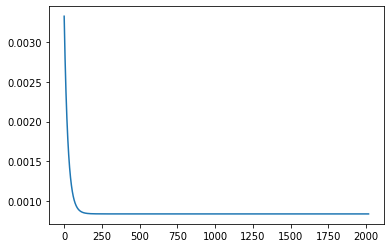

In [15]:
class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        w=w_old+(2*lr/y.shape[0])*np.matmul(x,(y-np.matmul(x.T,w_old)))
        return w

    def error(self,w,y,x):
        # mat=(y-np.matmul(x.T,w))**2
        # sum_of_mat=np.sum(mat)
        # err=sum_of_mat**0.5/mat.shape[0]
        from sklearn.metrics import mean_squared_error
        err=mean_squared_error(y,np.matmul(x.T,w))
        return err# write code here

    def mat_inv(self,y,x_aug):
        return np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_aug,x_aug.T)),x_aug),y)# write code here
      
    # By Gradien descent

    def Regression_grad_des(self,x,y,lr):
        
        w_old=np.zeros((x.shape[0],1))


        err=[]
        # w_old=np.random.random_integers(size=(x.shape[0],1),low=-10,high=10)
        while(1):
            w=self.grad_update(w_old=w_old,lr=lr,y=y,x=x)
            err.append(self.error(w,y,x))
            dev=np.abs(self.error(w,y,x)-self.error(w_old,y,x))
            if dev<=10**-1000:
                w_old=w
                break
            w_old=w
        # err=self.error(w_pred,y,x)
        return w_old,err

#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print("Shape of x",x.shape)

w = np.zeros((x.shape[0]+1,1))
print("Shape of w",w.shape)

## Augment the Input
x_aug = np.r_[np.ones((1,x.shape[1])),x]## Write your code here (Augment the data so as to include x0 also which is a vector of ones)
print("Shape of x_aug",x_aug.shape)

y=x_aug.T @ w  # vector multiplication
print("SHAPE OF Y",y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print("w_opt",w_opt)

# By Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
# print(w_pred)
print("W_grad descent",w_pred)
plt.plot(err)


#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [16]:
## Write your code here
from random import triangular
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

dataset=pd.read_csv("salary_pred_data.csv")
train_dataset,test_dataset=train_test_split(dataset,test_size=0.1,random_state=0)
train_target=train_dataset["Salary"]
test_target=test_dataset["Salary"]
train_dataset=train_dataset.drop(["Salary"],axis=1)
test_dataset=test_dataset.drop(["Salary"],axis=1)

# print(train_dataset.head(5))
# print(test_dataset.head(5))
# print(train_target.head(5))
# print(test_target.head(5))

x_train=train_dataset.iloc[:].values.T
y_train=train_target.iloc[:].values
x_test=test_dataset.iloc[:].values.T
y_test=test_target.iloc[:].values
# print(x_train.shape)
# print(np.ones((1,x_train.shape[1])).shape)



x_train=np.r_[np.ones((1,x_train.shape[1])),x_train]
x_test=np.r_[np.ones((1,x_test.shape[1])),x_test]
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

our=regression()
w_opt_matrix=our.mat_inv(y_train,x_train)
# print(x_test.shape)
print("Matrix obatined by direct method ours",w_opt_matrix)
y_predicted=np.matmul(x_test.T,w_opt_matrix)
print(error_calc(y_pred=y_predicted,y_actual=y_test))



from sklearn.linear_model import LinearRegression
# print(x_train[1:,:].shape)
model=LinearRegression().fit(x_train[1:,:].T,y_train)
print("Matrix obatined by direct method sklearn",model.coef_)
y_pred=model.predict(x_test[1:,:].T)
print(error_calc(y_actual=y_test,y_pred=y_pred))




Matrix obatined by direct method ours [2.e+04 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
7.609254307210003e-20
Matrix obatined by direct method sklearn [2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
5.05705139290419e-22
